In [11]:
import os 

import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
# sns.set(style="ticks", context="talk")
# plt.style.use("dark_background")

from scipy import signal
from scipy.io import wavfile
import wave
import struct

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [3]:
two_up =  os.path.abspath(os.path.join('.' ,"../.."))
print("Project root path is: ", two_up)


dataDirName = "data"
rawDataDirName = "test_data"
className = "noisy_sine"
data_path = os.path.join(two_up, dataDirName, rawDataDirName, className)

Project root path is:  D:\Programming\AudioMining


In [5]:
# frequency is the number of times a wave repeats a second
frequency = 1000
noisy_freq = 50
num_samples = 48000
 
# The sampling rate of the analog to digital convert
sampling_rate = 48000.0

In [6]:
#Create the sine wave and noise
sine_wave = [np.sin(2 * np.pi * frequency * x1 / sampling_rate) for x1 in range(num_samples)]
sine_noise = [np.sin(2 * np.pi * noisy_freq * x1/  sampling_rate) for x1 in range(num_samples)]
 
#Convert them to numpy arrays
sine_wave = np.array(sine_wave)
sine_noise = np.array(sine_noise)

In [7]:
# Add them to create a noisy signal
combined_signal = sine_wave + sine_noise

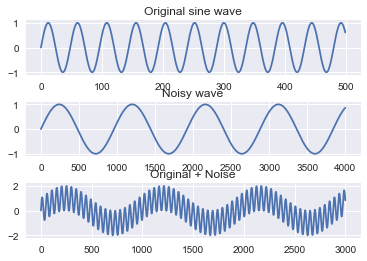

In [13]:
plt.subplot(3,1,1)
plt.title("Original sine wave")
 

# Need to add empty space, else everything looks scrunched up!
plt.subplots_adjust(hspace=.5)
plt.plot(sine_wave[:500])
plt.subplot(3,1,2)
plt.title("Noisy wave")
plt.plot(sine_noise[:4000])
plt.subplot(3,1,3)
plt.title("Original + Noise")
plt.plot(combined_signal[:3000])
plt.show()

In [14]:
data_fft = np.fft.fft(combined_signal)
freq = (np.abs(data_fft[:len(data_fft)]))

(0, 1200)

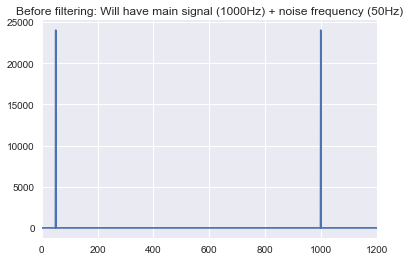

In [15]:
plt.plot(freq)
plt.title("Before filtering: Will have main signal (1000Hz) + noise frequency (50Hz)")
plt.xlim(0,1200)

In [19]:
filtered_freq = [f if (950 < index < 1050 and f > 1) else 0 for index, f in enumerate(freq)]

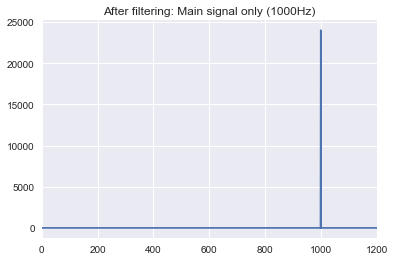

In [20]:
plt.plot(filtered_freq)
plt.title("After filtering: Main signal only (1000Hz)")
plt.xlim(0,1200)
plt.show()
plt.close()

In [21]:
recovered_signal = np.fft.ifft(filtered_freq)

c:\users\marius\appdata\local\programs\python\python36\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


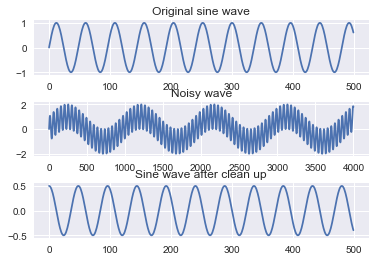

In [22]:
plt.subplot(3,1,1)
plt.title("Original sine wave")
 
# Need to add empty space, else everything looks scrunched up!
plt.subplots_adjust(hspace=.5)
plt.plot(sine_wave[:500])
plt.subplot(3,1,2)
plt.title("Noisy wave")
plt.plot(combined_signal[:4000])
plt.subplot(3,1,3)
plt.title("Sine wave after clean up")
plt.plot((recovered_signal[:500]))
plt.show()